# Table of Contents

2. <a href='#cleaning'>Data Cleaning</a>


3. <a href='#geocoding'>Geocoding</a>


4. <a href='#apply'>Apply Functions</a>


5. <a href='#dataframe'>Average # of Forest Fires Per Year in Each State</a>


6. <a href='#sum'>Total Number of Forest Fires in Each State Per Year</a>
    
    
7. <a href='#monthly'>Monthly Trends in Forest Fires</a>

# Data Cleaning
<a id='cleaning'></a>

In [92]:
import pandas as pd
import numpy as np


In [94]:
#read CSV file to a dataframe
df = pd.read_csv('brazil.csv', engine= 'python')

In [95]:
#look at unique month names to convert to numeric
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Mar�o', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [96]:
#convert month names to numeric
list1 = []
for element in df['month']:
    if element == 'Janeiro':
        list1.append(1)
    if element == 'Fevereiro':
        list1.append(2)
    if element == 'Mar�o':
        list1.append(3)
    if element == 'Abril':
        list1.append(4)
    if element == 'Maio':
        list1.append(5)
    if element == 'Junho':
        list1.append(6)
    if element == 'Julho':
        list1.append(7)
    if element == 'Agosto':
        list1.append(8)
    if element == 'Setembro':
        list1.append(9)
    if element == 'Outubro':
        list1.append(10)
    if element == 'Novembro':
        list1.append(11)
    if element == 'Dezembro':
        list1.append(12)
    
        

In [97]:
#add new column of numerical months to dataframe
df['month_num'] = list1

# Geocoding
<a id='geocoding'></a>

In [301]:
#getting the lattitude and longitude values for each state

import requests

url = "https://us1.locationiq.com/v1/search.php"

data = {
    'key': '3201f2161736ea',
    'q': 'Sergipe, Brazil',
    'format': 'json'
}

response = requests.get(url, params=data)

print(response.text)

[{"place_id":"222952227","licence":"https:\/\/locationiq.com\/attribution","osm_type":"relation","osm_id":"303940","boundingbox":["-11.5682434","-9.515","-38.245","-36.2819698"],"lat":"-10.6743911","lon":"-37.3773519","display_name":"Sergipe, Northeast Region, Brazil","class":"boundary","type":"administrative","importance":0.80410213669869,"icon":"https:\/\/locationiq.org\/static\/images\/mapicons\/poi_boundary_administrative.p.20.png"},{"place_id":"56818604","licence":"https:\/\/locationiq.com\/attribution","osm_type":"node","osm_id":"4663193845","boundingbox":["-5.0632506","-5.0232506","-38.9847026","-38.9447026"],"lat":"-5.0432506","lon":"-38.9647026","display_name":"Sergipe, Quixad\u00e1, Microrregi\u00e3o o Sert\u00e3o de Quixeramobim, Mesorregi\u00e3o dos Sert\u00f5es Cearenses, Cear\u00e1, Northeast Region, Brazil","class":"place","type":"suburb","importance":0.47,"icon":"https:\/\/locationiq.org\/static\/images\/mapicons\/poi_place_village.p.20.png"},{"place_id":"196953093","li

In [7]:
#creating a dictionary of state and lattitude/longitude values
lat_lon = {'Sao Paulo': (-23.5506507,-46.6333824),
           'Mato Grosso': (-12.2115009,-55.5716547),
           'Bahia':(-12.285251,-41.9294776),
           'Piau': (-21.5074738,-43.320587 ),
           'Goias': (-15.9323662, -50.1392928),
           'Minas Gerais': (-18.5264844, -44.1588654),
           'Tocantins': (-10.8855129, -48.3716912),
           'Amazonas': (-4.479925,-63.5185396),
           'Ceara': (-5.3264703,-39.7156073),
           'Paraiba': (-7.1219366,-36.7246845),
           'Maranhao': (-5.2085503,-45.3930262),
           'Par�': (-4.7493933,-52.8973006),
           'Pernambuco': (-8.4116316,-37.5919699),
           'Roraima': (2.135138,-61.3631922),
           'Santa Catarina': (-27.0628367,-51.114965),
           'Amapa': (1.3545442,-51.9161977),
           'Rondonia': (-10.943145,-62.8277863),
           'Acre': (-9.0478679,-70.5264976),
           'Rio': (-22.9110137,-43.2093727),
           'Espirito Santo': (-22.9110137,-43.2093727),
           'Alagoas': (-9.6611661,-36.6502426),
           'Distrito Federal': (-15.7754462,-47.7970891),
           'Sergipe': (-10.6743911,-37.3773519)}

# Apply functions to add Latitude and Longitude 
<a id='apply'></a>

In [8]:
#function to add lattitude values to each row in existing dataframe
def function1(df):
    return lat_lon[df][0]
    
    
df['lat'] = df['state'].apply(function1)

In [9]:
#function to add longitude values to each row in existing dataframe
def function2(df):
    return lat_lon[df][1]

df['lon'] = df['state'].apply(function2)

# Dataframe of Average Number of Forest Fires Per Year in Each State
<a id='dataframe'></a>

In [359]:
#function to find average number of forest fires each year by state
def df_year(df, year):
    df_year = df[df['year'] == year].groupby(['state']).mean()
    return df_year

In [407]:
#concatenating dataframes to one large dataframe
df_year_concat = pd.DataFrame()
for n in range (1998, 2018):
    df_year_concat = pd.concat([df_year_concat, df_year(df, n)])


In [409]:
#converting dataframe to csv file for use in Tableau
df_year_concat.to_csv(path_or_buf = 'concat.csv')

# Total Number of Forest Fires in Each State Per Year
<a id='sum'></a>

In [80]:
#loop to find the total number of forest fires in each state per year
list1= []
for n in range (1998, 2018):
    list1.append(df[df['year']==n].groupby(['state']).sum()['number'].sum())

total_num_ff = []
idx1 = []
for idx, i in enumerate(list1, start=1998):
    total_num_ff.append(int(i))
    idx1.append(idx)
    

In [30]:
#creating new dataframes which has a list of years and a list of the total number of forest fires over time.

year_col = pd.DataFrame(data =idx1, columns=['year'], dtype= float)
                                                       
ff_col = pd.DataFrame(data=total_num_ff, columns = ['total_ff'],dtype = float)
                                                       
                                                       
                                                       

In [31]:
#concatenating the two previous dataframes into one dataframe
year_total_ff = pd.concat([year_col, ff_col], axis=1)

In [32]:
#converting dataframe to csv for use in tableau
year_total_ff.to_csv(path_or_buf = 'year_total_ff.csv')

In [33]:
year_total_ff

,year,total_ff
0,1998.0,20013.0
1,1999.0,26882.0
2,2000.0,27351.0
3,2001.0,29071.0
4,2002.0,37390.0
5,2003.0,42760.0
6,2004.0,38453.0
7,2005.0,35004.0
8,2006.0,33832.0
9,2007.0,33037.0


# Monthly Trends in Forest Fires
<a id='monthly'></a>

In [98]:
#finding the sum of forest fires in each month over 20 years.
df_month_sum = df.groupby(['month_num']).sum()

In [99]:
df_month_sum.reset_index(inplace=True)

In [100]:
df_month_sum

,month_num,year,number
0,1,1086067,47747.844
1,2,1084050,30848.050
2,3,1084050,30717.405
3,4,1084050,28188.770
4,5,1084050,34731.363
5,6,1084050,56010.675
6,7,1084050,92326.113
7,8,1084050,88050.435
8,9,1084050,58578.305
9,10,1084050,88681.579


In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

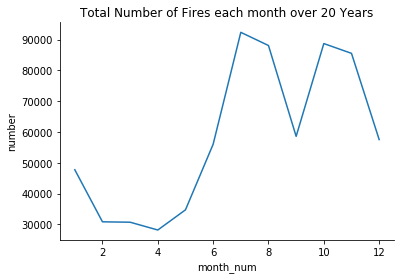

In [102]:
#graphing the total number of fires each month over 20 years.
sns.lineplot(df_month_sum['month_num'], df_month_sum['number']).set_title('Total Number of Fires each month over 20 Years')
sns.despine()

In [37]:
#individual year's number of forest fires over months.
def df_year_mon(df, year):
    df = df[df['year']==year].groupby(['month_num']).sum()
    df.reset_index(inplace=True)
    return df


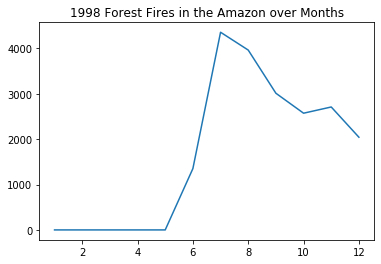

In [392]:
plt.title('1998 Forest Fires in the Amazon over Months')
plt.plot(df_year_mon(df, 1998)['month_num'], df_year_mon(df,1998)['number'])

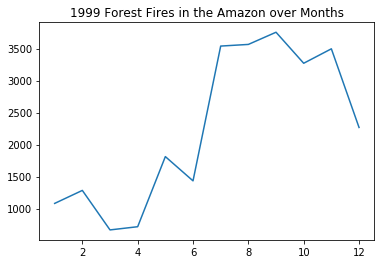

In [394]:
plt.title('1999 Forest Fires in the Amazon over Months')
plt.plot(df_year_mon(df, 1999)['month_num'], df_year_mon(df,1999)['number'])

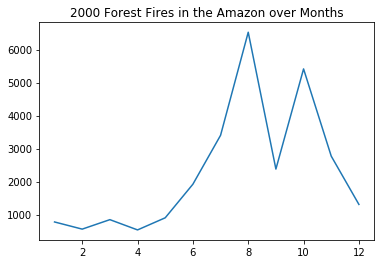

In [396]:
plt.title('2000 Forest Fires in the Amazon over Months')
plt.plot(df_year_mon(df, 2000)['month_num'], df_year_mon(df,2000)['number'])

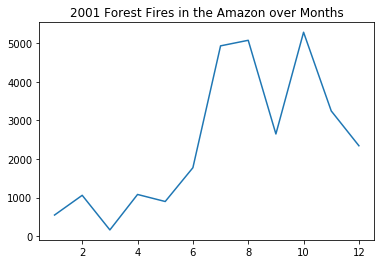

In [397]:
plt.title('2001 Forest Fires in the Amazon over Months')
plt.plot(df_year_mon(df,2001)['month_num'], df_year_mon(df,2001)['number'])

In [57]:
import seaborn as sns

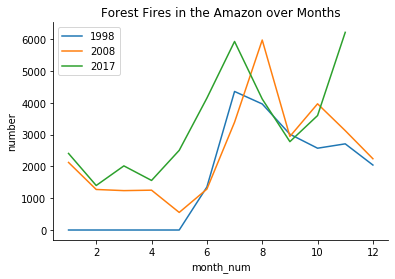

In [79]:
#comparing the number of forest fires each month in different years.
for n in [1998, 2008, 2017]:
    sns.lineplot(df_year_mon(df,n)['month_num'], df_year_mon(df,n)['number'], label=n).set_title('Forest Fires in the Amazon over Months')
    sns.despine()